### Installation notes 

##### Prerequisites 
Python v3 \
Jupyter notebook 

##### Python packages to run the code
pip install networkx \
pip install matplotlib 

#### Writing up what the code is doing for my sanity
- **gfa parser class**: reads the GFA output from SPAdes output and writing out links between the nodes to a dictionary. 
    - **input** SPAdes gfa file
    - **return** list of all the edges. 
    - Potential -  include function is to retrieve any information from the gfa to use for the graph traversal
    
    
- **maxDepth function**: count the depth of the right tree compared to the left tree from a given node in the dfs tree.
    - **input** the node and the graph
    - **return** depth of the left tree and the right tree 

    
- **rename_node function**: if a node is being traveresed more than once than the node is reanamed. 
    - **input** the node that needs to be renamed 
    - **return** the new node name to be added to the new graph
    

- **check_before_adding**: before adding a node, check if the node already exists or not, if it already exists then check if the neighbors are equal 2. 
    - **input** node1, node2 and new graph 
    - **return** new graph after adding the nodes accordingly
    - the function before adding, does call the rename_node function to make sure the correct node anme is being added
    
    
- **path_to_first_node**: using the shortest path function to count the shortest path from the left and right neighbor. 
    - **input** last_node, first_node, old_graph
    - **return** shortest left path and right path 

- final function - that calls the gfa parse and writes to a graph. Then the graph is re-added to a new graph to make the graph complete and eulerian

In [3]:
#gfa parser 
from collections import defaultdict
class gfa_parser:
    '''
    Read the spades output in GFA v1.0 graph to genrate 
    nodes and edges. 
    
    #Class initiation
    x=gfa_parser("chrom2.gfa")
    
    #calling a specific function within the class
    print(x.gfa_parser("chrom2.gfa"))
    #prints all the nodes and edges from the gfa 
    
    '''
    def __init__(self, gfa):
        self.gfa=gfa
        
    
    def gfa_parser(self, gfa):
        #reading the gfa file to a new variable
        g1=open(gfa, "r")
        nodes=[]
        edges=[]
        mydict=defaultdict(list)
        for line in g1:
            if (line.startswith("L")):
                link=line.split('\t')
                edges.append([link[1],link[3]])
        return(edges)

In [418]:
# Python3 program to find the maximum depth of tree from a given node
# counts the depth of the tree from the left tree and right tree
# Python3 program to find the maximum depth of tree 

import networkx as nx
# A binary tree node 
def maxDepth (node, dfs, graph): 
    if node is None: 
        return (0)
    else : 
        # Compute the depth of each subtree 
        n=list(G.nodes())[0]
        value=dfs.get(node)
        left_tree=0
        right_tree=0
        left=value[0]
        right=value[1]
        while (left is not None):
            try:
                left=dfs[left][0]
                left_tree=left_tree+1
            except KeyError:
                break
        while (right is not None):
            try:
                right=dfs[right][0]
                right_tree=right_tree+1
            except KeyError:
                break
        
    return (left_tree+1, right_tree+1)

########################################
# Driver program to test above function 
########################################
x=gfa_parser("chrom1.gfa")
#calling a specific function within the class
edges=x.gfa_parser("chrom1.gfa")
G=nx.Graph()
G.add_edges_from(edges)
n=list(G.nodes())[0]
successors=nx.dfs_successors(G,n)
#print (successors)
#print (successors["22"])
print (maxDepth('9', successors, G))

(4, 7)


In [413]:
# this function only renames the node since it already exists in the 
#   new graph 
# assumes that the node was already checked to confirm that 
#   the node is already added to the new graph 
def rename_node(node, new_graph):
    nodes=new_graph.nodes()
    count=1
    new_node=node+"_"+str(count)
    if (new_node in nodes):
        ngbr=len(list(new_graph.neighbors(new_node)))
        if (ngbr==1):
            new_node=new_node
        elif (ngbr==2):
            count=count+1
            new_node=node+"_"+str(count)
    
    return (new_node)

In [414]:
#before adding a new edge, check if the nodes in the edge are 
#  1) first that the node exists or not in the new_graph 
#  2) check if the node neighbors are 2 or 1
def check_before_adding(node1, node2, new_graph):
    if (node1 not in new_graph.nodes()) and (node2 not in new_graph.nodes()):
        new_graph.add_edge(node1, node2)
    elif (node1 in new_graph.nodes()) and (node2 not in new_graph.nodes()):
        n1_ngbrs=len(list(new_graph.neighbors(node1)))
        if (n1_ngbrs==1):
            new_graph.add_edge(node1, node2)
        elif (n1_ngbrs==2):
            x=rename_node(node1, new_graph)
            new_graph.add_edge(x, node2)
    elif(node1 not in new_graph.nodes()) and (node2 in new_graph.nodes()):
        n2_ngbrs=len(list(new_graph.neighbors(node2)))
        if (n2_ngbrs==1):
            new_graph.add_edge(node1, node2)
        elif (n2_ngbrs==2):
            x=rename_node(node2, new_graph)
            new_graph.add_edge(node1, x)
    elif (node1 in new_graph.nodes()) and (node2 in new_graph.nodes()):
        n1_ngbrs=len(list(new_graph.neighbors(node1)))
        n2_ngbrs=len(list(new_graph.neighbors(node2)))
        if (n1_ngbrs==1) and (n2_ngbrs==1):
            new_graph.add_edge(node1, node2)
        elif (n1_ngbrs==2) and (n2_ngbrs==1):
            x=rename_node(node1, new_graph)
            new_graph.add_edge(x, node2)
        elif (n1_ngbrs==1) and (n2_ngbrs==2):
            x=rename_node(node2, new_graph)
            new_graph.add_edge(node1,x)
        else:
            k=rename_node(node1, new_graph)
            v=rename_node(node2, new_graph)
            new_graph.add_edge(k,v)
    return(new_graph)

In [415]:
# finding the paths from the last node to the first node and selecting the 
# shortest path
# using the dictionary to retrieve the neighbors
def path_to_first_node(last_node, first_node, old_graph):
    #getting the neighbors of the last node and working on adding the nodes to the graph accordingly
    nbrs=list(old_graph.neighbors(last_node))
    left_path=list(nx.shortest_path(old_graph, source=nbrs[0], target=first_node))
    right_path=list(nx.shortest_path(old_graph, source=nbrs[1], target=first_node))
    return (left_path, right_path)

completing the graph
left ['11', '31', '4', '37', '5', '22', '2'] 7
right ['41', '16', '11', '27', '24', '6', '25', '22', '2'] 9
[('2', '12'), ('2', '22_2'), ('12', '3'), ('3', '17'), ('17', '19'), ('19', '17_1'), ('17_1', '8'), ('8', '26'), ('26', '23'), ('23', '21'), ('21', '31'), ('31', '11'), ('11', '27'), ('27', '24'), ('24', '6'), ('6', '25'), ('25', '22'), ('22', '5'), ('5', '37'), ('37', '4'), ('4', '37_1'), ('37_1', '5_1'), ('5_1', '22_1'), ('22_1', '25_1'), ('25_1', '32'), ('32', '33'), ('33', '39'), ('39', '9'), ('9', '40'), ('40', '34'), ('34', '38'), ('38', '35'), ('35', '39_1'), ('39_1', '9_1'), ('9_1', '29'), ('29', '18'), ('18', '30'), ('30', '18_1'), ('18_1', '28'), ('28', '36'), ('36', '20'), ('20', '41'), ('41', '16'), ('16', '11_1'), ('11_1', '31_1'), ('31_1', '4_1'), ('4_1', '37_2'), ('37_2', '5_2'), ('5_2', '22_2')]


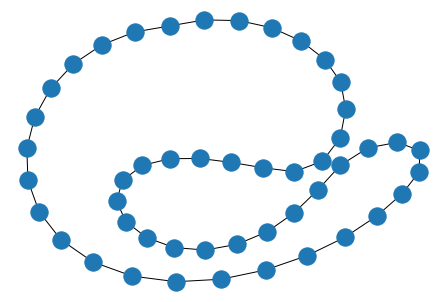

In [436]:
import matplotlib.pyplot as plt
import networkx as nx

#calling the gfa parser first to retrieve the data from gfa
x=gfa_parser("chrom1.gfa")
edges=x.gfa_parser("chrom1.gfa")

#using networkx package to write the edges from gfa to graph
G=nx.Graph()
G.add_edges_from(edges)
#getting the first node which will be the starting point to write out a 
#depth first traversal graph. 
n=list(G.nodes())[0]
successors=nx.dfs_successors(G,n)
length=len(successors)
#print (successors)
temp_node=0

#Walking through the old graph to expand the graph to traverse all the nodes 
#only once and make the graph eulerian
new_graph=nx.Graph()
count=0
#traverse through the dfs tree and add the edges
while (count < length):
    keys=list(successors.keys())
    #print ("list of keys", keys)
    key=keys[0]
    val=successors[key]
    #print ("key, val, count",key, val, count)
    #print ("successors=", successors)
    
    #adding the first edge if there is only branch down the tree
    if (len(val)==1) and (count==0):
        #print ("adding the first edge")
        new_graph.add_edge(key, val[0])
        count=count+1 
        successors.pop(key)
        
    elif (count!=0):
        #getting the last node
        new_edges=list(new_graph.edges)
        last_edge=new_edges[-1]
        last_node=last_edge[1]
        last_node=last_node.split('_')[0]
            
        #check point to make sure next value is a continuation
        if (last_node==key):
            #adding other edges if there is only one branch down
            if (len(val)==1):
                #print ("adding edge since there is only one path")
                new_graph=check_before_adding(key, val[0], new_graph)
                count=count+1
                successors.pop(key)
                
            #adding other edges but there are two branches in the tree 
            elif (len(val)!=1):
                #check which direction to traverse
                d=maxDepth(key, successors, G)
                left_depth=d[0]
                right_depth=d[1]

                #if the maximum depth to the left tree and right tree are both 1
                if (right_depth==1) and (left_depth==1):
                    #print ("adding the edges with depth of 1 on both sides")
                    new_graph=check_before_adding(key, val[0], new_graph)
                    #getting the last node
                    new_edges=list(new_graph.edges)
                    last_edge=new_edges[-1]
                    last_node=last_edge[1]
                    #tracing back
                    new_graph=check_before_adding(last_node, key, new_graph)
                    new_graph=check_before_adding(key, val[1], new_graph)
                    successors.pop(key)
                    
                #if the left depth is less than the right depth
                elif (left_depth<right_depth):
                    #print ("left depth is less than right depth", left_depth, right_depth)
                    if (left_depth==1):
                        new_graph=check_before_adding(key, val[0], new_graph)
                        #getting the last node
                        new_edges=list(new_graph.edges)
                        last_edge=new_edges[-1]
                        last_node=last_edge[1]
                        #tracing back
                        new_graph=check_before_adding(last_node, key, new_graph)
                        new_graph=check_before_adding(key, val[1], new_graph)
                        successors.pop(key)
                    else:
                        temp_node=key
                        new_graph=check_before_adding(key, val[0], new_graph)
                        successors.pop(key)
                        successors[key]=(val[1])
                            
                #if the right depth is less than the left depth
                elif (left_depth>right_depth):
                    #print ("left depth is more than right depth", left_depth, right_depth)
                    if (right_depth==1):
                        new_graph=check_before_adding(key, val[1], new_graph)
                        #getting the last node
                        new_edges=list(new_graph.edges)
                        last_edge=new_edges[-1]
                        last_node=last_edge[1]
                        #tracing back
                        new_graph=check_before_adding(last_node, key, new_graph)
                        new_graph=check_before_adding(key, val[0], new_graph)
                        successors.pop(key)
                    else:
                        temp_node=key
                        new_graph=check_before_adding(key,val[1], new_graph)
                        successors.pop(key)
                        successors[key]=(val[0])
        
                count=count+1
            
        #check point trace back to continue
        elif (last_node!=key):
            #print ("the last node and new key dont match")
            #print ("last node, temp node", last_node, temp_node)
            path=path_to_first_node(last_node, temp_node, G)
            left_path=path[0]
            right_path=path[1]
            #print ("last node, left path, right path", last_node, left_path, right_path)
            if (len(left_path)==len(right_path)):
                for f in range(len(left_path)):
                    if (f==0):
                        new_graph=check_before_adding(last_node, left_path[f], new_graph)
                    else:
                        new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
            elif (len(left_path)<len(right_path)):
                for f in range(len(left_path)):
                    if (f==0):
                        new_graph=check_before_adding(last_node, left_path[f], new_graph)
                    else:
                        new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
            elif (len(left_path)>len(right_path)):
                for f in range(len(right_path)):
                    if (f==0):
                        new_graph=check_before_adding(last_node, right_path[f], new_graph)
                    else:
                        new_graph=check_before_adding(right_path[f-1], right_path[f], new_graph)
            new_graph=check_before_adding(temp_node, successors[temp_node], new_graph)
            successors.pop(temp_node)
         
        #print ("keys", keys)
        #print (new_graph.edges)
        
# adding the last connection from the last node int he dfs graph
# getting the last node 
# adding the last connection to complete the graph
print ("completing the graph")
new_edges=list(new_graph.edges)
last_edge=new_edges[-1]
last_node=last_edge[1]
last_node=last_node.split('_')[0]
path=path_to_first_node(last_node, n, G)
left_path=path[0]
right_path=path[1]
print ("left", left_path, len(left_path))
print ("right", right_path, len(right_path))
if (len(left_path)==len(right_path)):
    for f in range(len(left_path)):
        if (f==0):
            new_graph=check_before_adding(last_node, left_path[f], new_graph)
        else:
            new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
elif (len(left_path)<len(right_path)):
    for f in range(len(left_path)):
        if (f==0):
            new_graph=check_before_adding(last_node, left_path[f], new_graph)
        else:
            new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
elif (len(left_path)>len(right_path)):
    for f in range(len(right_path)):
        if (f==0):
            new_graph=check_before_adding(last_node, right_path[f], new_graph)
        else:
            new_graph=check_before_adding(right_path[f-1], right_path[f], new_graph)

print (new_graph.edges)
nx.draw(new_graph)